# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.parser import parse
from tqdm.notebook  import tqdm_notebook
tqdm_notebook.pandas()


from nltk.tokenize import TweetTokenizer
from tqdm.notebook import tqdm

from collections import Counter
import matplotlib.pyplot as plt
import pdb # python debugger

In [2]:
# try : 

#     from pandas_profiling import ProfileReport

# except Exception as e :
#     !{sys.executable} -m pip install pandas_profiling
#     from pandas_profiling import ProfileReport

In [2]:
path = "/Users/jocelynbeaumanoir/Library/CloudStorage/OneDrive-Personal/Atelier/Atelier Python/NLP/"

## Sentiment140

### Data Loading

In [3]:
sentiment140 = pd.read_csv(path+"training.1600000.processed.noemoticon.csv",encoding="latin-1",header=None)

In [4]:
set(sentiment140[3])

{'NO_QUERY'}

In [5]:
sentiment140 = sentiment140.drop(3,axis=1)
sentiment140 = sentiment140.set_index(1)
sentiment140.columns = ["target","date","user","text"]
sentiment140.index.name = "ids"

In [6]:
sentiment140 = sentiment140.sort_index()

In [7]:
set(sentiment140.target) 

{0, 4}

### Analysis

In [8]:
sentiment140 = sentiment140[~sentiment140.index.duplicated()]
sentiment140 = sentiment140[~sentiment140.text.duplicated()]

In [9]:
# Number of different articles in the database
print(len(sentiment140.index.unique()))

1581466


In [10]:
sentiment140.text.apply(len).mean()

74.47572631975648

<AxesSubplot:>

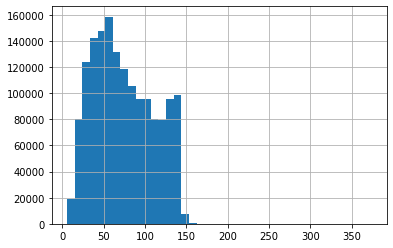

In [11]:
sentiment140.text.apply(len).hist(bins=40)

In [12]:
sentiment140.groupby(sentiment140.target).size()

target
0    788998
4    792468
dtype: int64

In [13]:
sentiment140['text_len'] = sentiment140.text.apply(lambda x: len(x.split(' '))) # reprendre car très naïf

In [14]:
sentiment140.date = sentiment140["date"].progress_map(lambda date : parse(date,ignoretz=True))

  0%|          | 0/1581466 [00:00<?, ?it/s]

Ne marche pas pour l'instant, problème d'index

In [34]:
sentiment140.index = [int(i)  for i in sentiment140.index]

In [87]:
df = sentiment140.loc[sentiment140.index[:4],("target")].reset_index()
df.columns = ['index', 'target']

In [3]:
df = pd.DataFrame([[1467810369,1467810672,1467810917,1467811184],[0,0,4,4]]).T
df.columns=['index', 'target']
df

,index,target
0,1467810369,0
1,1467810672,0
2,1467810917,4
3,1467811184,4


In [ ]:
# profile = ProfileReport(df, title="BBC News", html={"style": {"full_width": True}})
# profile.to_notebook_iframe()

In [15]:
sentiment140

,target,date,user,text,text_len
ids,,,,,
1467810369,0,2009-04-06 22:19:45,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",20
1467810672,0,2009-04-06 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...,22
1467810917,0,2009-04-06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Man...,19
1467811184,0,2009-04-06 22:19:57,ElleCTF,my whole body feels itchy and like its on fire,11
1467811193,0,2009-04-06 22:19:57,Karoli,"@nationwideclass no, it's not behaving at all....",22
...,...,...,...,...,...
2329205009,0,2009-06-25 10:28:28,dandykim,Sick Spending my day laying in bed listening ...,11
2329205038,0,2009-06-25 10:28:28,bigenya,Gmail is down?,4
2329205473,0,2009-06-25 10:28:30,LeeLHoke,rest in peace Farrah! So sad,7


In [16]:
sentiment140["text_len"].std()

7.027394067641432

[]

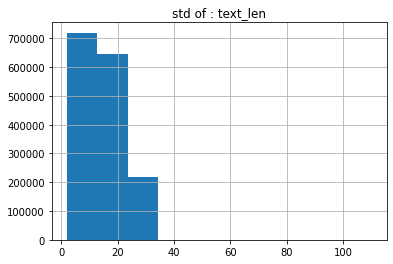

In [17]:
plt.figure()
plt.title("std of : {0}".format("text_len"))
sentiment140["text_len"].hist()
plt.plot()

#### Zipf's Law

In [18]:
# tokenizers = [TreebankWordTokenizer(), ToktokTokenizer(), TweetTokenizer()]
tokenizers = [TweetTokenizer()]

for tok in tqdm(tokenizers):
  print('Using tokenizer: %s' % (tok))
  arr = sentiment140[0:5000].text.apply(lambda x: tok.tokenize(x)).array
  # We flatten the list. We could use this : arr = reduce(add, arr)   but it would take too much time.
  arr = [ x for X in arr for x in X]
  # the set object transforms a list to the set of unique elements in the list :
  print('The 30 first tokens: %s' % (arr[:30]) )
  print("Vocabulary size: {0} with {1} tokenizer".format(len(set(arr)), tok))
  print('='*5)  

  0%|          | 0/1 [00:00<?, ?it/s]

Using tokenizer: <nltk.tokenize.casual.TweetTokenizer object at 0x7fc8215f0880>
The 30 first tokens: ['@switchfoot', 'http://twitpic.com/2y1zl', '-', 'Awww', ',', "that's", 'a', 'bummer', '.', 'You', 'shoulda', 'got', 'David', 'Carr', 'of', 'Third', 'Day', 'to', 'do', 'it', '.', ';D', 'is', 'upset', 'that', 'he', "can't", 'update', 'his', 'Facebook']
Vocabulary size: 13270 with <nltk.tokenize.casual.TweetTokenizer object at 0x7fc8215f0880> tokenizer
=====


  0%|          | 0/1 [00:00<?, ?it/s]

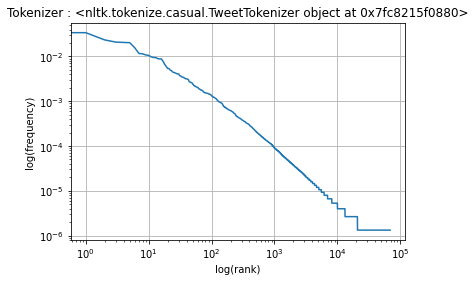

In [19]:
for tok in tqdm(tokenizers):
  arr = sentiment140[0:50000].text.apply(lambda x: tok.tokenize(x)).array
  # We flatten the list. We could use this : arr = reduce(add, arr)   but it would take too much time.
  arr = [ x for X in arr for x in X]
  # We use reduce to concatenate all the lists in arr, but we don't use "set" 
  # so that we can count occurencies with a Counter object 
  c = Counter(arr)
  # print(c)
  # Formating the counter object to a proper dataset
  d = pd.DataFrame(c, index=['occurrences']).transpose().reset_index()
  d.columns=['word', 'occurences']
  # Computing frequencies instead of occurences
  nb_total = d.occurences.sum()
  d['freq'] = d.occurences.apply(lambda x: x/nb_total)
  # Sorting by frequency, most frequent word at the top of the df
  d = d.sort_values('freq', ascending=False)
  plt.figure()
  plt.grid()
  plt.xscale('log')  # Using log scale
  plt.yscale('log')  # Using log scale
  plt.xlabel('log(rank)')
  plt.ylabel('log(frequency)')
  plt.title("Tokenizer : {0}".format(tok))
  x = list(range(d.shape[0]))
  plt.plot(x, d.freq)
  plt.show()

## Sqavd V.2

### Data Loading

In [20]:
squadv2 = pd.read_json(path+"train-v2.0.json")
squadv2 = squadv2.drop("version",axis=1)

In [21]:
titles = []
other = []
contexts = []

for data in tqdm_notebook(squadv2["data"]): 
    title = data["title"]
    paragraphs = data["paragraphs"]
    for paragraph in paragraphs : 
        titles.append(title)
        other.append(paragraph["qas"])
        contexts.append(paragraph["context"])


squadv2 = pd.DataFrame({"title":titles,"quas":other,"context":contexts})


  0%|          | 0/442 [00:00<?, ?it/s]

In [22]:
squadv2 = squadv2[~squadv2.context.duplicated()]

### Analysis

In [23]:
squadv2

,title,quas,context
0,Beyoncé,[{'question': 'When did Beyonce start becoming...,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...
1,Beyoncé,"[{'question': 'After her second solo album, wh...",Following the disbandment of Destiny's Child i...
2,Beyoncé,"[{'question': 'In her music, what are some rec...","A self-described ""modern-day feminist"", Beyonc..."
3,Beyoncé,[{'question': 'Beyonce's younger sibling also ...,"Beyoncé Giselle Knowles was born in Houston, T..."
4,Beyoncé,[{'question': 'What town did Beyonce go to sch...,Beyoncé attended St. Mary's Elementary School ...
...,...,...,...
19030,Matter,"[{'plausible_answers': [{'text': '1643', 'answ...",Isaac Newton (1643–1727) inherited Descartes' ...
19031,Matter,[{'plausible_answers': [{'text': 'the early 20...,"There is an entire literature concerning the ""..."
19032,Matter,"[{'plausible_answers': [{'text': 'particle', '...",In the late 19th century with the discovery of...
19033,Matter,"[{'plausible_answers': [{'text': 'four', 'answ...",These quarks and leptons interact through four...


In [98]:
try : 

    from pandas_profiling import ProfileReport

except Exception as e :
    !{sys.executable} -m pip install pandas_profiling
    from pandas_profiling import ProfileReport

In [108]:
ProfileReport(squadv2)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Zipf's Law

In [24]:
# tokenizers = [TreebankWordTokenizer(), ToktokTokenizer(), TweetTokenizer()]
tokenizers = [TweetTokenizer()]

import pdb # python debugger
for tok in tqdm(tokenizers):
  print('Using tokenizer: %s' % (tok))
  arr = squadv2[0:5000].context.apply(lambda x: tok.tokenize(x)).array
  # We flatten the list. We could use this : arr = reduce(add, arr)   but it would take too much time.
  arr = [ x for X in arr for x in X]
  # the set object transforms a list to the set of unique elements in the list :
  print('The 30 first tokens: %s' % (arr[:30]) )
  print("Vocabulary size: {0} with {1} tokenizer".format(len(set(arr)), tok))
  print('='*5)  

  0%|          | 0/1 [00:00<?, ?it/s]

Using tokenizer: <nltk.tokenize.casual.TweetTokenizer object at 0x7fc820f0a1d0>
The 30 first tokens: ['Beyoncé', 'Giselle', 'Knowles-Carter', '(', '/', 'biːˈjɒnseɪ', '/', 'bee-YON-say', ')', '(', 'born', 'September', '4', ',', '1981', ')', 'is', 'an', 'American', 'singer', ',', 'songwriter', ',', 'record', 'producer', 'and', 'actress', '.', 'Born', 'and']
Vocabulary size: 40731 with <nltk.tokenize.casual.TweetTokenizer object at 0x7fc820f0a1d0> tokenizer
=====


  0%|          | 0/1 [00:00<?, ?it/s]

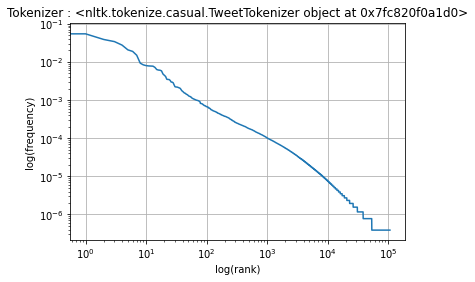

In [25]:
from collections import Counter
import matplotlib.pyplot as plt

for tok in tqdm(tokenizers):
  arr = squadv2[0:50000].context.apply(lambda x: tok.tokenize(x)).array
  # We flatten the list. We could use this : arr = reduce(add, arr)   but it would take too much time.
  arr = [ x for X in arr for x in X]
  # We use reduce to concatenate all the lists in arr, but we don't use "set" 
  # so that we can count occurencies with a Counter object 
  c = Counter(arr)
  # print(c)
  # Formating the counter object to a proper dataset
  d = pd.DataFrame(c, index=['occurrences']).transpose().reset_index()
  d.columns=['word', 'occurences']
  # Computing frequencies instead of occurences
  nb_total = d.occurences.sum()
  d['freq'] = d.occurences.apply(lambda x: x/nb_total)
  # Sorting by frequency, most frequent word at the top of the df
  d = d.sort_values('freq', ascending=False)
  plt.figure()
  plt.grid()
  plt.xscale('log')  # Using log scale
  plt.yscale('log')  # Using log scale
  plt.xlabel('log(rank)')
  plt.ylabel('log(frequency)')
  plt.title("Tokenizer : {0}".format(tok))
  x = list(range(d.shape[0]))
  plt.plot(x, d.freq)
  plt.show()

# NLP Pipeline

In [ ]:
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
nlp = English()

# Instanciating the tokenizer
tokenizer = Tokenizer(nlp.vocab)

# Repeating the earlier vocabulary count
arr = bbcamazon[bbcamazon.source=='bbcnews'].title.apply(lambda x: [w.text for w in tokenizer(x)]).array
arr = [ x for X in arr for x in X]
print("Vocabulary size with Spacy's tokenizer: {}".format(len(set(arr))))

# Inspecting a tokenization sample
tokenization_sample = bbcamazon[bbcamazon.source=='bbcnews'].title.head().apply(lambda x: 
                                              [w.text for w in tokenizer(x)])
print("Tokenization sample:\n {}".format(tokenization_sample))

# Cleaning of the databases

In [23]:
def remove_hashtags(tokens):
  tokens = map(lambda x: x.replace('#', ''), tokens)
  return list(tokens)

def remove_url(tokens):
  tokens = filter(lambda x: "http" not in x, tokens)
  return list(tokens)

def remove_html(tokens):
  tokens = filter(lambda x: x[0]+x[-1] != '<>', tokens)
  return list(tokens)

In [25]:
def tokenize_url_hashtags(corpus, tweets=False):

    tokenizer = TweetTokenizer()

    tokenized_sentences = []
    for sentence in tqdm(corpus):
    # separating sentences
        tokens = tokenizer.tokenize(sentence)
        tokens = remove_url(tokens)
        tokens = remove_html(tokens)
        tokens = remove_hashtags(tokens)
        tokens = list(map(lambda x: x.lower(), tokens))
        tokenized_sentences.append(tokens)

    return tokenized_sentences

In [36]:
cleanedTweets = tokenize_url_hashtags(sentiment140.text)

  0%|          | 0/1581466 [00:00<?, ?it/s]

In [38]:
cleanedTweets

1581466

# Work in progress